In [3]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pywt

def coef_pyramid_plot(coefs, first=0, scale='uniform', ax=None, **kwargs):
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, axisbg='lightgrey')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), len(coefs[i]))
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        print first, n_levels, i, x.shape, ymin, ymax.shape
        ax.vlines(x, ymin, ymax, **kwargs)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    #ax.set_title('Wavelet Detail Coefficients', fontsize=16,
    #        position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

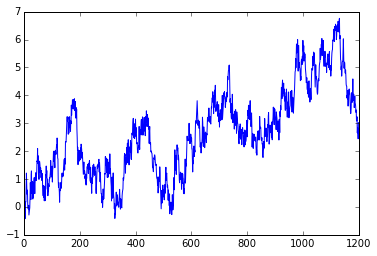

In [4]:
from sigvisa.models.noise.armodel.model import ARModel, ErrorModel

em = ErrorModel(mean=0, std=0.3)
ar = ARModel(em=em, params=(.7, .2, .1))
signal = ar.sample(n=1200)
plot(signal)

In [12]:
coefs = pywt.wavedec(signal, 'db4', mode='per', level=4)
print [len(c) for c in coefs]


for 


[75, 75, 150, 300, 600]


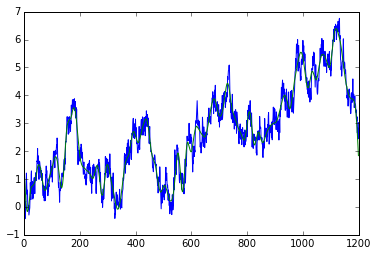

In [6]:
def flatten_wavelet_coefs(coefs):
    return np.concatenate((coefs[0], coefs[1], coefs[2]))

def unflatten_wavelet_coefs(cc):    
    coefs = [cc[:19], cc[19:38], cc[38:76], np.zeros((75,)), np.zeros((150,)), np.zeros((300,)), np.zeros(600,)]
    return coefs

cc = flatten_wavelet_coefs(coefs)
c2 = unflatten_wavelet_coefs(cc)
plot(signal)
plot(pywt.waverec(c2, 'db8', mode='per'))

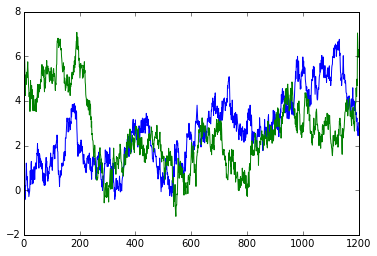

In [7]:
plot(signal)
plot(pywt.waverec(coefs, 'db3', mode='per'))

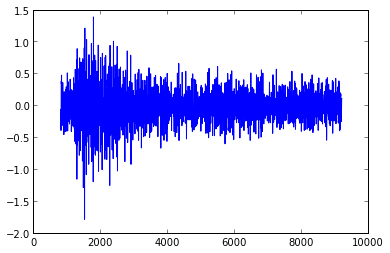

In [1]:
from sigvisa import Sigvisa
from sigvisa.signals.io import load_event_station_chan
from sigvisa.source.event import get_event

s = Sigvisa()

evid=5296082
sta='MKAR'
cursor = s.dbconn.cursor()
wave = load_event_station_chan(evid, sta, 'auto', cursor=cursor).filter("%s" % 'freq_0.8_3.5')
cursor.close()
plot(wave.data)

/home/dmoore/.virtualenvs/sigvisa/local/lib/python2.7/site-packages/numpy/ma/core.py:2992: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = ndarray.__getitem__(_data, indx)
/home/dmoore/.virtualenvs/sigvisa/local/lib/python2.7/site-packages/numpy/ma/core.py:3021: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout._mask = _mask[indx]


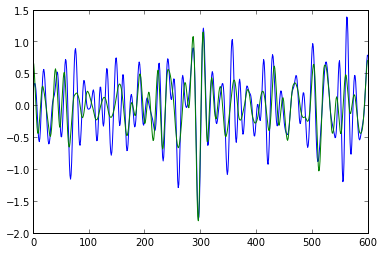

In [11]:
from sigvisa.models.ttime import tt_predict

def extract_arrival_window(wave, ev, n_s=15.0):
    pred_atime = ev.time + tt_predict(ev, 'MKAR', 'P')
    offset_s = pred_atime - wave['stime']
    offset_idx = int(offset_s * wave['srate'])
    return wave.data[offset_idx:offset_idx+n_s*wave['srate']]

ev = get_event(5296082)
w = extract_arrival_window(wave, ev)
plot(w)
coefs = pywt.wavedec(w, 'db8', mode='per')
#coefs[0] *= 0
#coefs[1] *= 0
coefs[3] *= 0
coefs[4] *= 0
coefs[5] *= 0

re_w = pywt.waverec(coefs, 'db8', mode='per')
plot(re_w)

In [14]:
coefs = pywt.wavedec(w, 'db8', mode='per')
print [len(c) for c in coefs]

[19, 19, 38, 75, 150, 300]


In [58]:
print coefs

[array([ 1.92402694,  3.55052488,  3.09367486,  5.51366698,  4.68604064,
        3.27190588,  2.54712761,  5.08235434,  1.85797065,  2.95712743,
        3.58255731,  1.37521845,  3.93123269,  2.8018648 ,  6.73030361,
        3.44113874,  4.37929776,  1.98544002,  3.8528064 ]), array([-0.61552846,  0.61534294,  0.61740949, -0.44422148,  0.39675043,
       -0.37760063,  1.17047034,  1.24779864,  2.48884902, -0.32195984,
       -0.93717296,  1.63350804,  0.09908133,  1.34947399, -0.93512182,
       -0.56379904,  1.13864855, -2.05310423,  0.5048848 ]), array([-0.15990906, -0.07451874, -0.34282664, -0.06937638,  0.4449667 ,
       -0.43963468, -0.37173825,  0.65443601, -0.35883567,  0.99756793,
        0.02612599, -0.84564082,  0.47263472, -0.47429346, -0.44472358,
        0.17377015,  1.10101209, -0.78734514,  0.37288194, -0.41539323,
        0.50579772, -0.53261709,  0.78946772, -0.39146619, -0.07701274,
       -0.46244734,  0.03913898, -0.13433722,  0.28832851,  0.01512218,
       -0.290